In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import scipy 

In [2]:
# Load the file and get rid of the multi-index style dataframe

p_cutoff = 0.7

file = pd.read_csv('Animal_20984_Light_Var1.csv')

col_name = file.columns

body_part_list = {'scorer':'coords',
                  col_name[1]:'Snoutx', col_name[2]:'Snouty', col_name[3]:'Snout_Likelihood', 
                  col_name[4]:'LFLx', col_name[5]:'LFLy', col_name[6]:'LFL_Likelihood',
                 col_name[7]:'RFLx', col_name[8]:'RFLy', col_name[9]:'RFL_Likelihood',
                 col_name[10]:'LHLx', col_name[11]:'LHLy', col_name[12]:'LHL_Likelihood',
                 col_name[13]:'RHLx', col_name[14]:'RHLy', col_name[15]:'RHL_Likelihood',
                 col_name[16]:'Tailtipx', col_name[17]:'Tailtipy', col_name[18]:'Tailtip_Likelihood'}

file_new_columns = file.rename(columns = body_part_list)

file_new_columns.head() #check to make sure columns are named correctly

,coords,Snoutx,Snouty,Snout_Likelihood,LFLx,LFLy,LFL_Likelihood,RFLx,RFLy,RFL_Likelihood,LHLx,LHLy,LHL_Likelihood,RHLx,RHLy,RHL_Likelihood,Tailtipx,Tailtipy,Tailtip_Likelihood
0,bodyparts,Snout,Snout,Snout,LFL,LFL,LFL,RFL,RFL,RFL,LHL,LHL,LHL,RHL,RHL,RHL,Tailtip,Tailtip,Tailtip
1,coords,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,0,2.919310927,72.30459094,8.76E-07,732.3126793,205.4486693,1.02E-06,723.9522648,213.6769271,6.14E-07,1.095406532,73.22281551,1.68E-06,2.002629876,75.59471732,3.57E-06,728.9427946,206.1388276,0.001879852
3,1,2.936819315,72.26689553,9.35E-07,732.2667162,205.4577307,1.02E-06,723.9294565,213.6842613,6.00E-07,1.107718706,73.21539474,1.79E-06,1.990225315,75.57514957,3.74E-06,728.8867974,206.132072,0.001819973
4,2,2.936819315,72.26689553,9.35E-07,732.2667162,205.4577307,1.02E-06,723.9294565,213.6842613,6.00E-07,1.107718706,73.21539474,1.79E-06,1.990225315,75.57514957,3.74E-06,728.8867974,206.132072,0.001819973


In [3]:
# Now drop the extraneous rows 
file_preproc = file_new_columns.drop(file_new_columns.index[[0,1]])
#file_preproc.head()

#saves your pre-processed file to csv using pandas (which also adjusts formatting issues)
file_preproc.to_csv('20984_var_test.csv')

# and now re-load dataset
pre_proc_csv =  pd.read_csv('20984_var_test.csv')

<AxesSubplot:xlabel='coords', ylabel='RFLy'>

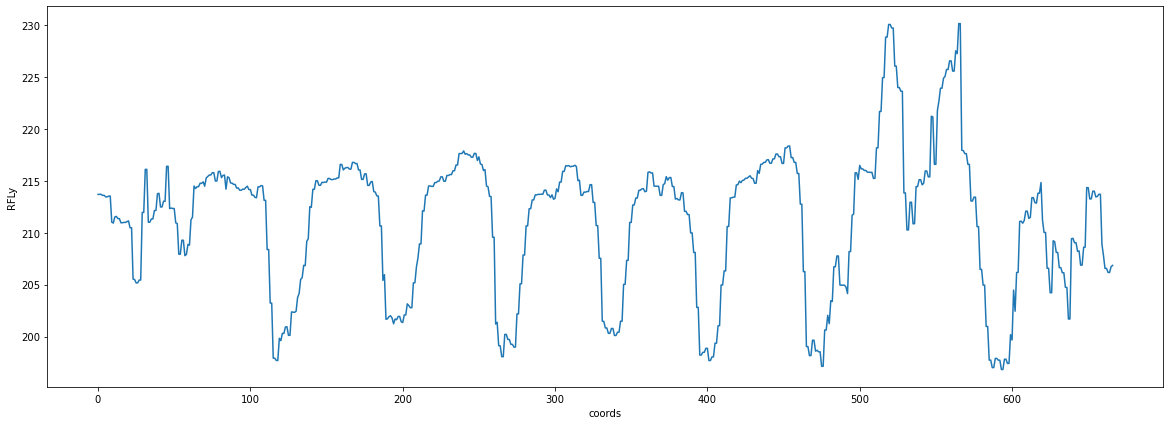

In [4]:
# and plot 
plt.rcParams['figure.figsize']=(20,7)
sns.lineplot(x="coords", y="RFLy", data=pre_proc_csv)

In [5]:
# this creates two dataframes
over_p_cutoff = pre_proc_csv.loc[pre_proc_csv.RFL_Likelihood > p_cutoff]
under_p_cutoff = pre_proc_csv.loc[pre_proc_csv.RFL_Likelihood <= p_cutoff]

<AxesSubplot:xlabel='coords', ylabel='Snouty'>

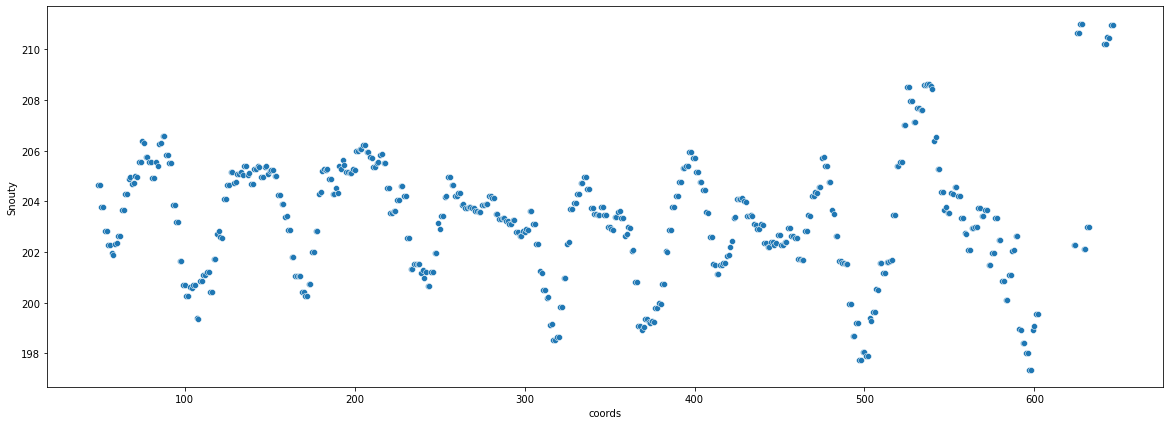

In [6]:
# and plot 
plt.rcParams['figure.figsize']=(20,7)
sns.scatterplot(x="coords", y="Snouty", data=over_p_cutoff)

<AxesSubplot:xlabel='coords', ylabel='Snouty'>

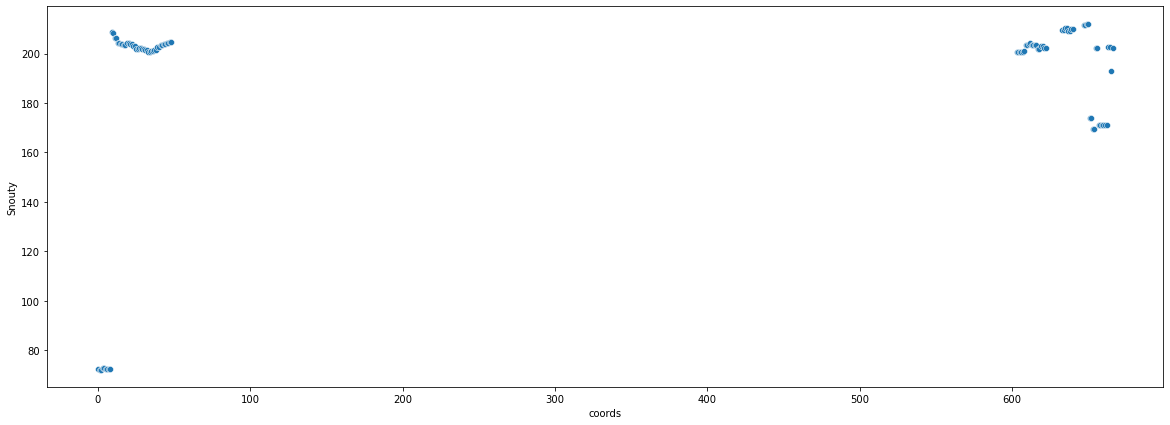

In [7]:
# and plot 
plt.rcParams['figure.figsize']=(20,7)
sns.scatterplot(x="coords", y="Snouty", data=under_p_cutoff)